In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

In [2]:
   ### Examples ###
# Saudi Arabia:  'sau'
# United States: 'usa'
# Germany:       'deu'
# Japan:         'jpn'
# Australia:     'aus'

counrty_id = 'usa' 

In [3]:
processed_data_df = pd.read_csv('processed_year_origin_hs07_4.csv')
country_names_df = pd.read_csv('country_names.tsv', sep = '\t')
country_names_df = country_names_df.drop(['id'], axis=1).set_index('id_3char')

temp = processed_data_df.groupby(['origin', 'hs07', 'year']).sum().reset_index()
temp_2 = temp.groupby(['origin', 'hs07', 'year']).sum().loc[(counrty_id)]

x = temp_2.unstack(level=0).index.to_numpy()
y = temp_2.unstack(level=0).values.T
labels = temp_2.unstack(level=0).columns.levels[1].to_list()

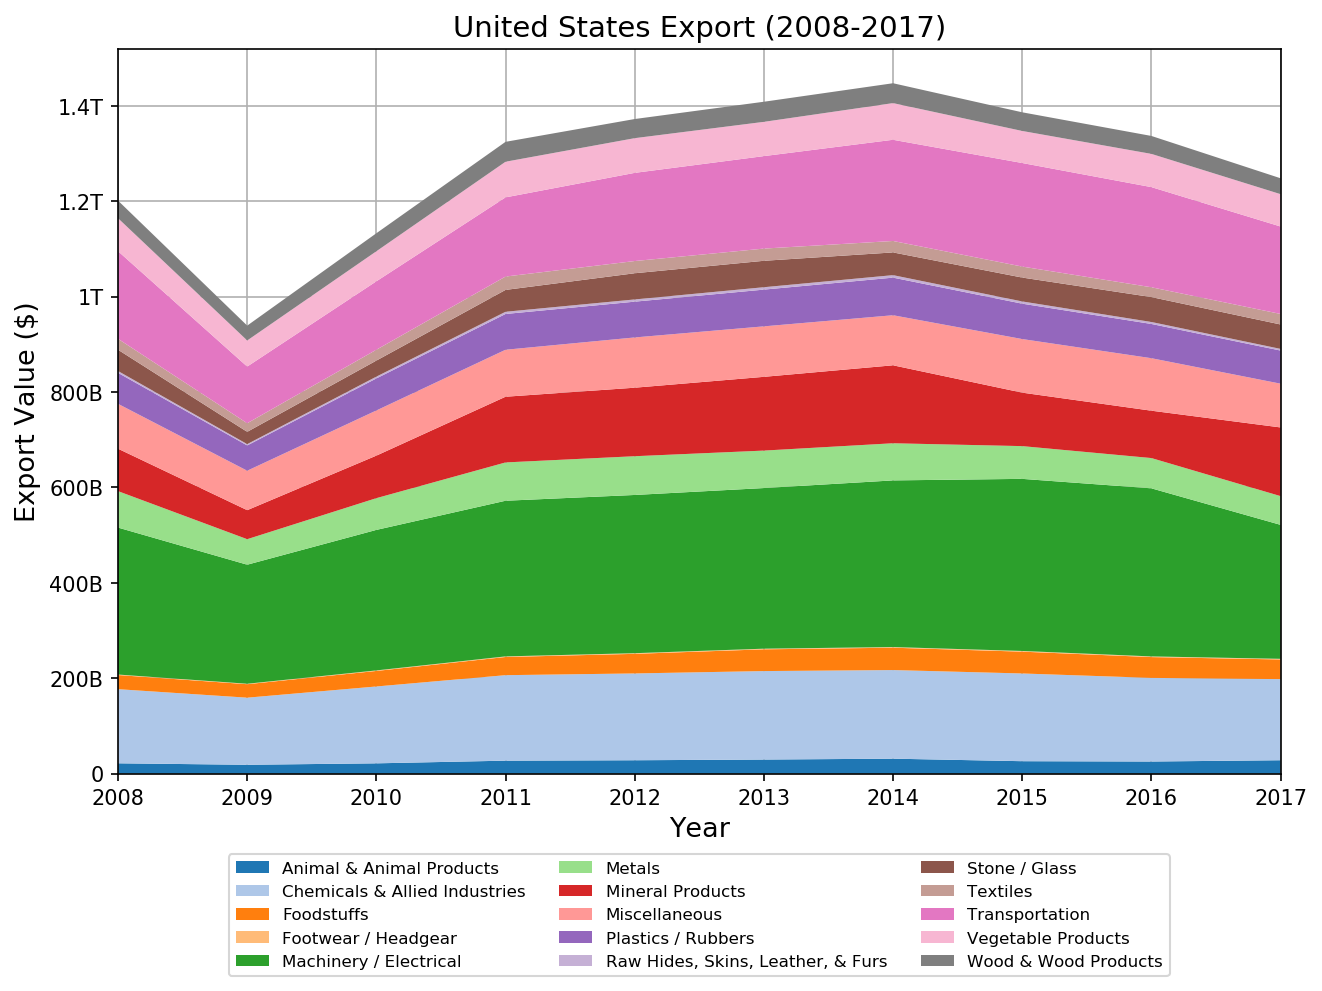

In [4]:
fig = plt.figure(figsize=(10,8), dpi=150)
fig.patch.set_facecolor('w')
ax = plt.subplot(111)

ax.stackplot(x, y, labels = labels, zorder=2, colors = mpl.cm.tab20.colors[:15])

# Shrink current axis's height by 25% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.25,
                 box.width, box.height * 0.8])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=False, ncol=3, fontsize=8)

ax.grid(zorder=0)
ax.set_xlim(2008,2017)
ax.set_ylabel('Export Value ($)', fontsize=13)
ax.set_xlabel('Year', fontsize=13)

tick = ticker.EngFormatter(sep = '')
tick.ENG_PREFIXES[0]=''
tick.ENG_PREFIXES[3]='K'
tick.ENG_PREFIXES[6]='M'
tick.ENG_PREFIXES[9]='B'
tick.ENG_PREFIXES[12]='T'

ax.yaxis.set_major_formatter(tick)

plt.title(country_names_df.loc[counrty_id].values[0] + ' Export (2008-2017)', fontsize=14)
plt.show()